In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets

In [15]:
(X, Y), (Xtest, Ytest) = datasets.mnist.load_data()

In [16]:
X.shape

(60000, 28, 28)

In [17]:
from matplotlib import pyplot as plt

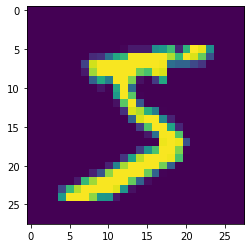

In [18]:
plt.imshow(X[0])
plt.show()

In [19]:
# ถ้าต้องการแปลงรูปให้เป็น vector หรือแปลงขนาดรูปให้เหลือ 1 มิติ เพื่อให้เป็น dense ที่จะเข้าสู่ neural network ได้
X = X.reshape((len(X), -1))
X = X.astype(np.float32) / 255.0

Xtest = Xtest.reshape((len(Xtest), -1)).astype(np.float32) / 255.0


In [20]:
X.shape

(60000, 784)

In [21]:
# วัดประสิทธิภาพของ feature ขนาด 784
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
clf = SVC()
clf.fit(X, Y)
Z = clf.predict(Xtest)

In [23]:
print('accuracy rate =', accuracy_score(Ytest, Z))
print('confusion matrix:')
print(confusion_matrix(Ytest, Z))

accuracy rate = 0.9792
confusion matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


In [36]:
# ทำ autoencoder โดยขาเข้าและขาออกจะต้องเป็นของสิ่งเดียวกัน มิติต้องเท่ากัน
# 784-392-196-98-196-392-784
inputs = Input(shape=X.shape[1]) # 784

en1 = layers.Dense(X.shape[1] // 2, activation='relu') # 392
en2 = layers.Dense(X.shape[1] // 4, activation='relu') # 192

en3 = layers.Dense(X.shape[1] // 8, activation='relu') # 98

de1 = layers.Dense(X.shape[1] // 4, activation='relu') # 192
de2 = layers.Dense(392, activation='relu') # 392
de3 = layers.Dense(X.shape[1], activation='relu') # 784


In [37]:
outputs = de3(de2(de1(en3(en2(en1(inputs))))))

model = Model(inputs, outputs)

In [38]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss=losses.MeanAbsoluteError())

In [39]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 392)               307720    
                                                                 
 dense_25 (Dense)            (None, 196)               77028     
                                                                 
 dense_26 (Dense)            (None, 98)                19306     
                                                                 
 dense_27 (Dense)            (None, 196)               19404     
                                                                 
 dense_28 (Dense)            (None, 392)               77224     
                                                                 
 dense_29 (Dense)            (None, 784)               3081

In [40]:
model.fit(X, X, epochs=200)

Epoch 1/200
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1302
Epoch 2/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1278
Epoch 3/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1221
Epoch 4/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1130
Epoch 5/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1025
Epoch 6/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0942
Epoch 7/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0876
Epoch 8/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0833
Epoch 9/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0801
Epoch 10/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0767
Epoch 11/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0739
Epoch 12/200
1875/1875 [==============================] - 8s 4ms/step - lo

In [41]:
Xencoded = en3(en2(en1(X))).numpy()
print(Xencoded.shape)

(60000, 98)


In [42]:
# ทดสอบว่าตัวที่ถูก encode จะสามารถทดแทน feature ตัวยาวได้หรือไม่
clf1 = SVC()
clf1.fit(Xencoded, Y)

# สร้าง Xtest ที่เหมือนกับ X เพื่อเอามา predict
Xtestencoded = en3(en2(en1(Xtest))).numpy()

In [43]:
Z1 = clf1.predict(Xtestencoded)
print('accuracy rate=', accuracy_score(Ytest, Z1))
print('confusion matrix:')
print(confusion_matrix(Ytest, Z1))
# รันเร็วขึ้น ความแม่นยำทรงๆ เดิม

accuracy rate= 0.9624
confusion matrix:
[[ 968    0    1    1    0    4    3    1    2    0]
 [   0 1124    3    1    0    1    3    1    2    0]
 [   8    3  986    8    8    1    6   10    2    0]
 [   1    0    9  970    1   10    1    6    9    3]
 [   1    0    3    0  949    0    9    1    2   17]
 [   5    1    3   20    2  844    6    2    4    5]
 [  10    2    2    1    4    6  930    0    3    0]
 [   1   11   19    3    4    0    0  974    3   13]
 [   3    0    4   12    6    7    7    5  928    2]
 [   4    4    3   11   17    3    0    8    8  951]]
